# **SmartSense Assessment-2 (By: Jinay Dagli)**

In [ ]:
!pip install librosa

In [126]:
import librosa ## Importing necessary libraries
import numpy
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn import metrics
from keras.optimizers import Adam

In [ ]:
!wget https://drive.google.com/file/d/12Iwpj92ddR_DVOBq3xdeBwac0bCBNunB/view?usp=drive_link

In [121]:
path = "data/"
files = os.listdir(path)
i = 1
for file in files:
  os.rename(os.path.join(path + file), os.path.join(path + f'video_{i}' + ".mp3"))
  i += 1        ## renaming files for simpler interpretation
i = 0


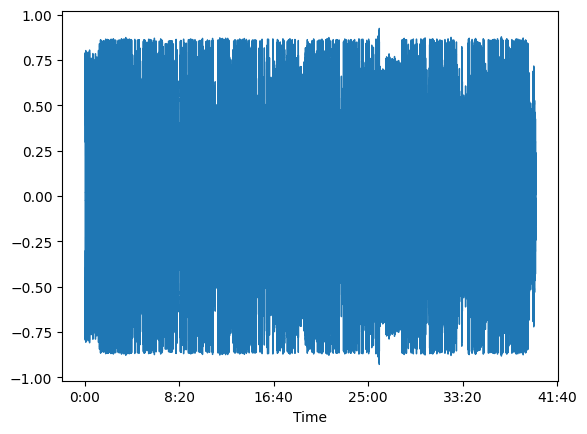

In [122]:
data1, sr1 = librosa.load('data/video_1.mp3')
data2, sr2 = librosa.load('data/video_2.mp3')
data3, sr3 = librosa.load('data/video_3.mp3')

librosa.display.waveshow(data1) ## Displaying the audio waveforms

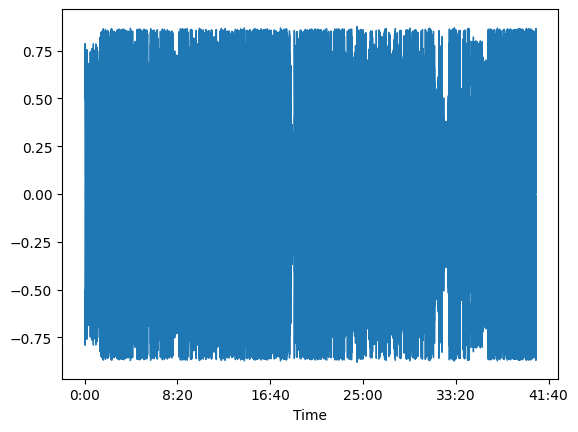

In [116]:
librosa.display.waveshow(data2)

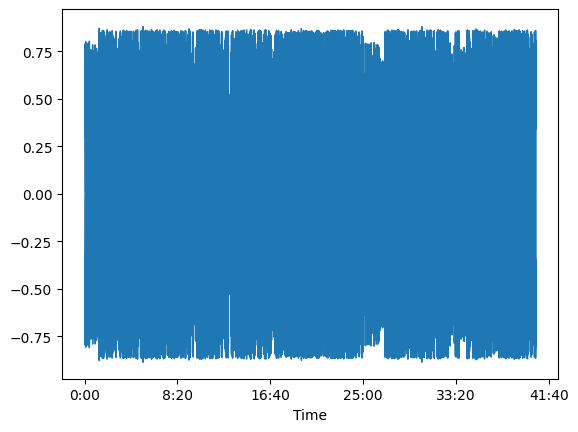

In [117]:
librosa.display.waveshow(data3)

In [ ]:
features, labels = [], []
files = os.listdir('data/')
for file in files:
  file_name = os.path.join(path + file)
  data, sr = librosa.load(file_name)
  mfc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0) ## Mel Frequency Coefficient (feature extraction) from Librosa documentation

  feature = mfc
  label = file
  print(feature, label)
  features.append(feature) ## Extracting the features
  labels.append(label)

In [40]:
X = np.array(features)
y = np.array(labels)

label = LabelEncoder()

y = keras.utils.to_categorical(label.fit_transform(y)) ##converting the video to categories

In [54]:
num_labels = y.shape[1]
filter_size = 3

model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(num_labels))
model.add(Activation('softmax'))  ## librosa documentation

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X, y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 1s 765ms/step - loss: 20.8473 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 13.3533 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 3.4392 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 13.8329 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 15.2706 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 11.3383 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 8.2953 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 8.8764 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 6.0312 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 1.3667 - accuracy: 0.6667


**Summarization**

In [58]:
!pip install deepgram-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 3.6 MB/s eta 0:00:00


In [62]:
from deepgram import Deepgram
import json, asyncio, os

In [63]:
options = {
   "diarize": True,
   "paragraphs": True,
   "model": 'general',
} ##Deepgram documentation

In [81]:
DEEPGRAM_API_KEY = "0ad6e6a9305711fbd1127e2f57aa599fe8446a57"
path_to_vid = "data/video_3.mp3"

dg = Deepgram(DEEPGRAM_API_KEY)

with open(path_to_vid, "rb") as audio:
    source = {"buffer": audio, "mimetype":'audio/mp3'}
    response = dg.transcription.sync_prerecorded(source, options)
with open(f"transcript.json", "w") as transcript:
    json.dump(response, transcript)
    print(json.dumps(response))  ## deepgram doc



{"metadata": {"transaction_key": "deprecated", "request_id": "bf95796e-6d3c-453f-828f-e3afa5967d0e", "sha256": "5001385c7c46b3cc152c977c63d0c44beda4022fdcb34933e2c03c4833b67abb", "created": "2023-09-28T11:27:29.155Z", "duration": 2427.324, "channels": 1, "models": ["c7226e9e-ae1c-4057-ae2a-a71a6b0dc588"], "model_info": {"c7226e9e-ae1c-4057-ae2a-a71a6b0dc588": {"name": "general-enhanced", "version": "2022-05-18.1", "arch": "polaris"}}}, "results": {"channels": [{"alternatives": [{"transcript": "Support for this show comes from the a sixteen Z podcast. There are a lot of tech podcasts out there and most of them sound pretty much the same, not this one. The a sixteen Z podcast takes you into self driving cars, down the factory floor, and straight to the people designing new materials, data centers, small nuclear reactors, and electric boats. Post, Steph Smith, sits down with some of the most influential technologists like Steve Wozniak, Mark Anderson, and Nobel Prize winning astrophysicis

In [84]:
DEEPGRAM_API_KEY = "0ad6e6a9305711fbd1127e2f57aa599fe8446a57"
path_to_vids = ["data/video_1.mp3", "data/video_2.mp3", "data/video_3.mp3"]

dg = Deepgram(DEEPGRAM_API_KEY)

for vid in path_to_vids:
  with open(vid, "rb") as audio:
    source = {"buffer": audio, "mimetype":'audio/mp3'}
    response = dg.transcription.sync_prerecorded(source, options)
  with open(f"transcripts/transcript_{vid[11:12]}.json", "w") as transcript:
    json.dump(response, transcript)
               # print(transcript)


In [86]:
for filename in os.listdir("transcripts/"):
       with open(f"transcripts/{filename}", "r") as file:
           transcript = json.load(file)
       paras = transcript["results"]["channels"][0]["alternatives"][0]["paragraphs"] ## Converting to paras
      #  print(paragraphs['transcript'])
       with open(f"paras/{filename[11:12]}.txt", "w") as f:
           for each in paras['transcript']:
               f.write(each)

In [89]:
# To visualise
with open(f"transcripts/transcript_1.json", "r") as file:
    transcript = json.load(file)
    paras = transcript["results"]["channels"][0]["alternatives"][0]["paragraphs"] # from the official Deepgram documentation
    print(paras['transcript'])


Speaker 0: Support for this show comes from the a sixteen Z podcast. There are a lot of tech podcasts out there and most of them sound pretty much the same, not this one. The a sixteen Z podcast takes you into self driving cars, down the factory floor, and straight to the people designing new materials, data centers, small nuclear reactors, and electric boats. Host, Steph Smith, sits down with some of the most influential technologists like Steve Wozniak, Mark Anderson, and Nobel Prize winning astrophysicist, John Mother. Eves drop on the future.

Listen to the a sixteen z podcast wherever you get your podcast.

Speaker 1: Support for this show comes from American Express Business. If you're a small business owner, you wanna partner with someone that can help make your day to day, a rewarding experience. That's where American Express can come in. American Express business cards are built for your business with features and benefits like the ability to earn membership rewards points. O

{'Support': 4, 'for': 29, 'this': 44, 'show': 4, 'comes': 4, 'from': 19, 'the': 235, 'a': 179, 'sixteen': 4, 'Z': 3, 'podcast.': 4, 'There': 6, 'are': 24, 'lot': 19, 'of': 96, 'tech': 2, 'podcasts': 2, 'out': 6, 'there': 16, 'and': 93, 'most': 6, 'them': 9, 'sound': 3, 'pretty': 15, 'much': 9, 'same,': 2, 'not': 25, 'one.': 4, 'The': 19, 'podcast': 5, 'takes': 3, 'you': 110, 'into': 14, 'self': 2, 'driving': 2, 'cars,': 2, 'down': 4, 'factory': 2, 'floor,': 2, 'straight': 2, 'to': 101, 'people': 17, 'designing': 2, 'new': 26, 'materials,': 2, 'data': 4, 'centers,': 2, 'small': 4, 'nuclear': 2, 'reactors,': 2, 'electric': 2, 'boats.': 2, 'Host,': 2, 'Steph': 2, 'Smith,': 2, 'sits': 2, 'with': 35, 'some': 8, 'influential': 2, 'technologists': 2, 'like': 62, 'Steve': 2, 'Wozniak,': 2, 'Mark': 3, 'Anderson,': 2, 'Nobel': 2, 'Prize': 2, 'winning': 2, 'astrophysicist,': 2, 'John': 2, 'Mother.': 2, 'Eves': 2, 'drop': 2, 'on': 52, 'future.\n': 2, 'American': 4, 'Express': 4, 'Business.': 2, 'I

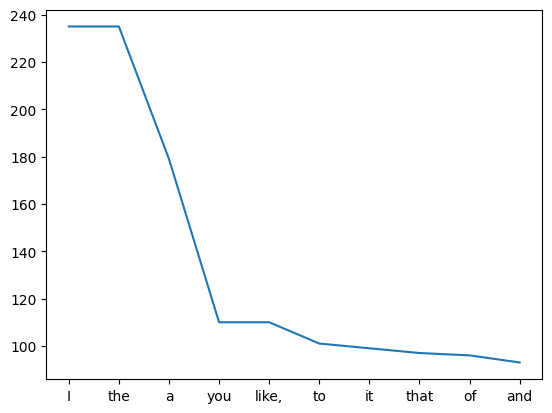

In [105]:
with open(f"paras/1.txt", "r") as f:
  lines = f.readlines()

  dict = {}

  for line in lines:
    if ":" in line:
      sep = line.split(":")
      sep2 = sep[1].split(" ")
      for word in sep2:
        if word != '':
          dict[word] = dict.get(word, 1) + 1
  print(dict)  ## Finding the maximum number of words!

keys = list(dict.keys())
values = list(dict.values())
sorted_value_index = np.argsort(values)[::-1]
dict_sorted = {keys[i]: values[i] for i in sorted_value_index}
plt.plot(list(dict_sorted.keys())[0:10], list(dict_sorted.values())[0:10])